In [1]:
import os
datadir = f"{os.environ['DATA']}VICReg/output/5.0_0/"

In [2]:
import pyhepmc
import numpy as np

# Mini cheat-sheet for functions:
# Open a HEPMC file for reading
reader = pyhepmc.open(f"{datadir}/finishedruns/finishedrun_1.hepmc")
# print(reader.read())
for event in reader:
    # print(event)
    # print(event.event_number)
    for particle in event.particles:
        if particle.status == 1:
            print(particle)
            print(particle.generated_mass)
            print(particle.momentum)
            print(particle.momentum.px, particle.momentum.py, particle.momentum.pz, particle.momentum.e, np.sqrt(particle.momentum.py**2+particle.momentum.px**2))
            print(particle.momentum.theta(), particle.momentum.phi(), particle.momentum.perp())
            print("part PID:", particle.pid)
            print("part status:", particle.status)
            print("part momentum:", particle.momentum)
            break

GenParticle(FourVector(-4.17, 0.343, 4.44, 6.11), mass=0.13957, pid=211, status=1)
0.13957
FourVector(-4.17, 0.343, 4.44, 6.11)
-4.174910911604761 0.3427734531832455 4.44114001173207 6.106601276385353 4.188958672515601
0.7561853341974797 3.0596732171081813 4.188958672515601
part PID: 211
part status: 1
part momentum: FourVector(-4.17, 0.343, 4.44, 6.11)


In [3]:
import awkward as ak

reader_partial = pyhepmc.open(f"{datadir}/stop_start_5.0.hepmc")
reader1 = pyhepmc.open(f"{datadir}/finishedruns/finishedrun_1.hepmc")
reader2 = pyhepmc.open(f"{datadir}/finishedruns/finishedrun_2.hepmc")

for event_partial in reader_partial:
    g_partial = pyhepmc.view.to_dot(event_partial, size=(20, 10), color_lepton_or_boson='red')
    pyhepmc.view.savefig(g_partial, '../share/partialrun.svg')
    parts = event_partial.numpy.particles
    akarr = ak.Array({
        'pid': parts.pid,
        'generated_mass': parts.generated_mass,
        'pid': parts.pid,
        'px': parts.px,
        'py': parts.py,
        'pz': parts.pz,
        'E': parts.e,
        'status': parts.status,
    })
    print(akarr[ (akarr['status'] == 1) & (akarr['pid'] ==-1) ])
for event1 in reader1:
    # pyhepmc.view.savefig(event1, 'event1.svg')
    # pyhepmc.view.savefig(event1, 'event1.pdf')
    parts = event1.numpy.particles
    akarr = ak.Array({
        'pid': parts.pid,
        'generated_mass': parts.generated_mass,
        'pid': parts.pid,
        'px': parts.px,
        'py': parts.py,
        'pz': parts.pz,
        'E': parts.e,
        'status': parts.status,
    })
    print(akarr[ (akarr['status'] == 23) & (akarr['pid'] ==-1) ])
    
    g1 = pyhepmc.view.to_dot(event1, size=(20, 10), color_lepton_or_boson='red')
    pyhepmc.view.savefig(g1, '../share/finishedrun1.svg')
for event2 in reader2:
    # pyhepmc.view.savefig(event2, 'event2.svg')
    # pyhepmc.view.savefig(event2, 'event2.pdf')
    g2 = pyhepmc.view.to_dot(event2, size=(20, 10), color_lepton_or_boson='red')
    pyhepmc.view.savefig(g2, '../share/finishedrun2.svg')

[]
[]


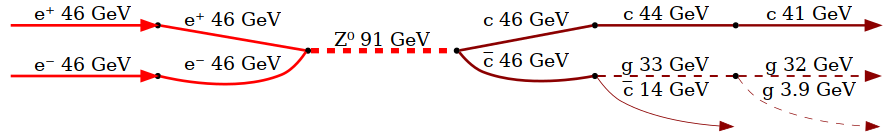

In [24]:
g_partial

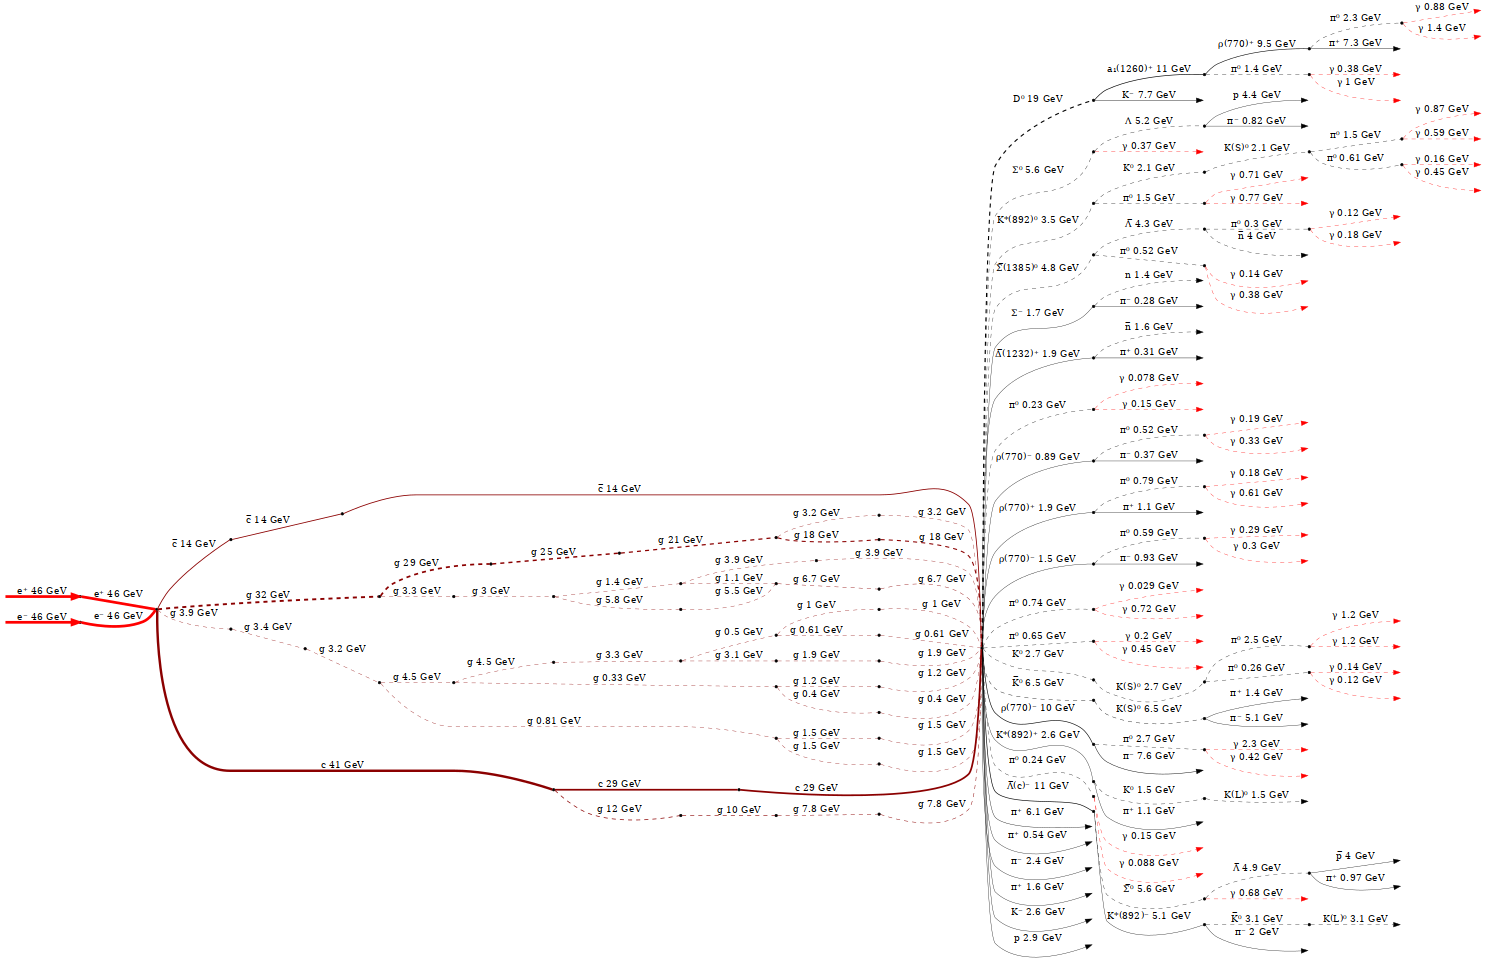

In [5]:
g1

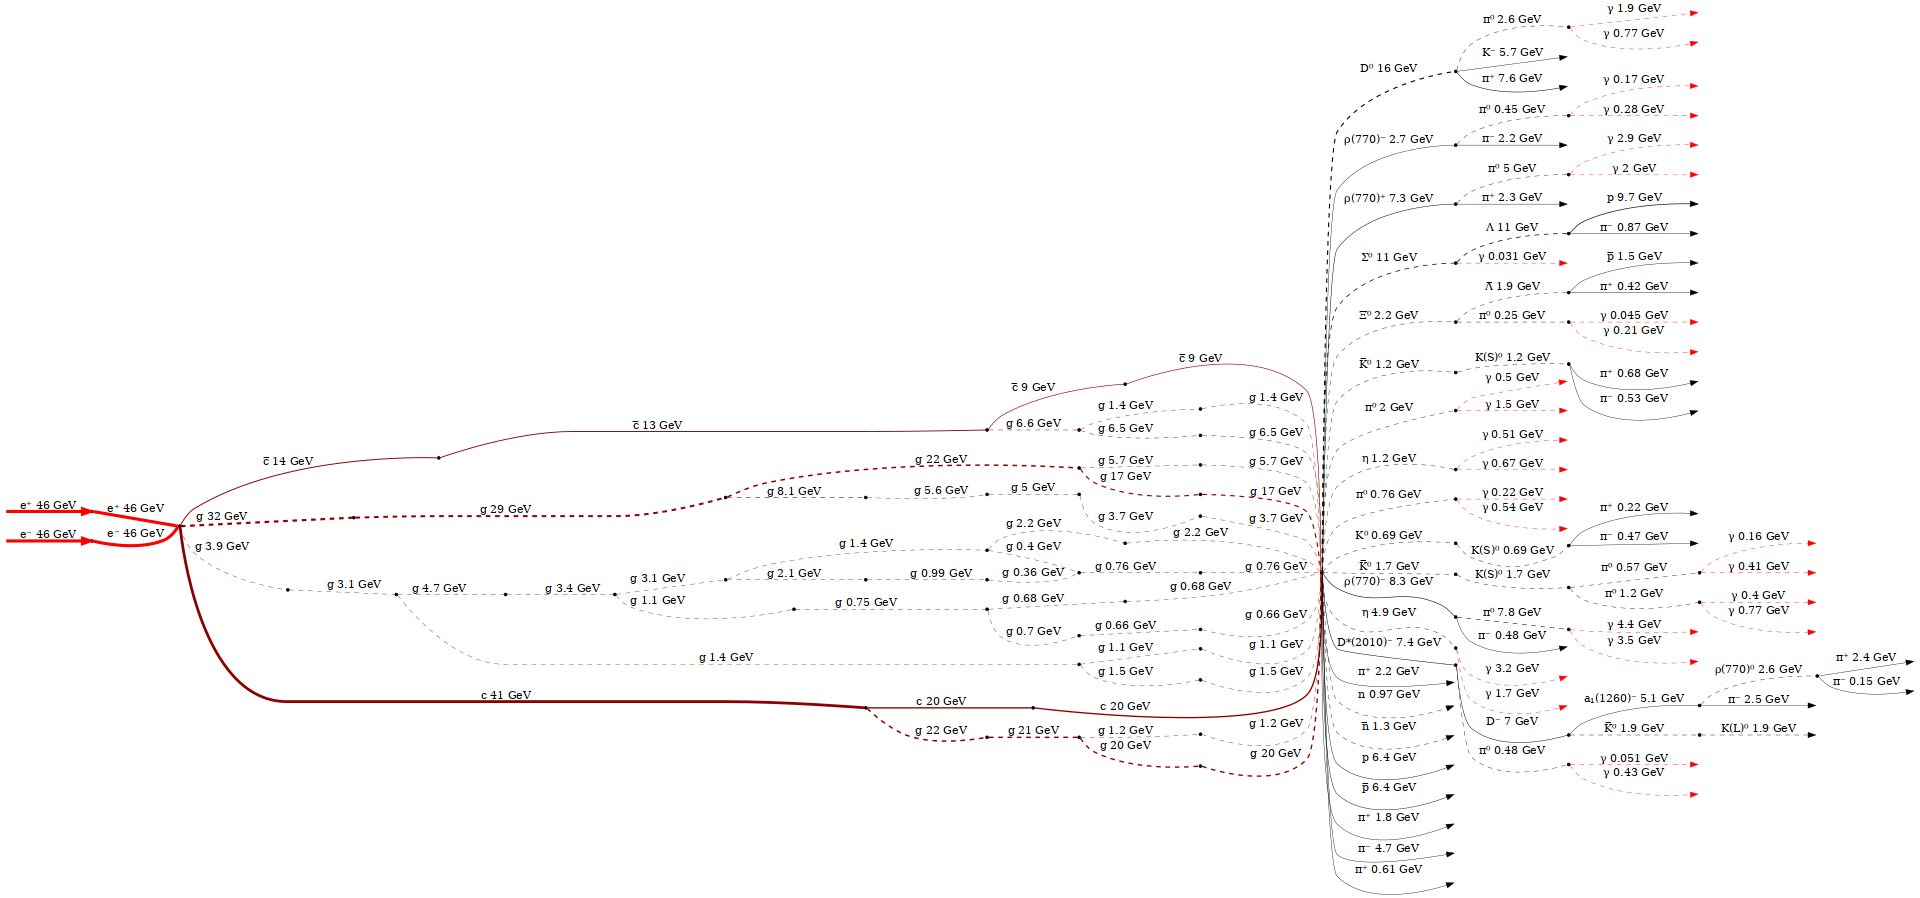

In [6]:
g2

## Jet Clustering Playground:

In [7]:
import fastjet
jetdef = fastjet.JetDefinition(fastjet.antikt_algorithm, 0.6)

In [8]:
import numpy as np
import awkward as ak

array1 = ak.Array(
         {
          "bla": [1, 1, 2],
          "px": [1.2, 32.2, 32.45],
          "py": [3.2, 64.21, 63.21],
          "pz": [5.4, 543.34, 543.14],
          "E": [23.5, 755.12, 835.56],
          }
     )
array2 = ak.Array(
         {
          "bla": [1],
          "px": [1.2],
          "py": [3.2],
          "pz": [5.4],
          "E": [23.5],
          }
     )

akarr = ak.Array([array1, array2])

In [9]:
ak.fields(array1)

np.unique(array1['bla'].to_numpy())

array([1, 2])

In [10]:
cluster1 = fastjet.ClusterSequence(array1, jetdef)
cluster2 = fastjet.ClusterSequence(array2, jetdef)
cluster = fastjet.ClusterSequence(akarr, jetdef)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [11]:
cluster1.inclusive_jets()

<Array [{px: 1.2, py: 3.2, pz: 5.4, ...}, ...] type='2 * Momentum4D[px: flo...'>

In [12]:
jets = cluster2.inclusive_jets()
jets

<Array [{px: 1.2, py: 3.2, pz: 5.4, ...}] type='1 * Momentum4D[px: float64,...'>

In [13]:
jets = cluster.inclusive_jets()
jets

<Array [[{px: 1.2, py: 3.2, ...}, ...], ...] type='2 * var * Momentum4D[px:...'>

In [14]:
ak.num(jets, axis=-1)

<Array [2, 1] type='2 * int64'>

In [22]:
jets[jets['px'] > 5.0]

<MomentumArray4D [[{px: 64.7, py: 127, ...}], []] type='2 * var * Momentum4...'>

In [15]:
import vector
vector.register_awkward()

ak.behavior = vector.backends.awkward.behavior

testjet = jets[0][0]
print(testjet)

v = vector.obj(px=testjet.px, py=testjet.py, pz=testjet.pz, E=testjet.E)
print(v)
print(v.to_rhophietatau())

{px: 1.2, py: 3.2, pz: 5.4, E: 23.5}
MomentumObject4D(px=1.2, py=3.2, pz=5.4, E=23.5)
MomentumObject4D(pt=3.417601498127013, phi=1.2120256565243244, eta=1.2383651522500303, mass=22.614375958668415)


In [16]:
jets.behavior = vector.backends.awkward.behavior
jets.to_rhophietatau()
# vector.obj(**jets[0][0].to_list())

<MomentumArray4D [[{rho: 3.42, phi: ..., ...}, ...], ...] type='2 * var * M...'>

In [17]:
test = vector.awk(jets)
type(test)

vector.backends.awkward.MomentumArray4D

In [18]:
test.to_rhophietatau()

<MomentumArray4D [[{rho: 3.42, phi: ..., ...}, ...], ...] type='2 * var * M...'>